In [3]:
# thuat toan lap chinh sach
import numpy as np

grid_size = 5
gamma = 0.9
goal_state = (4, 4)

# Xay dung ham gia tri ban dau
V = np.zeros((grid_size, grid_size))
# Khoi tao chinh sach ban dau 
policy = np.random.choice(a=[0, 1, 2, 3], size=(grid_size, grid_size))  # 0: up, 1: down, 2: left, 3: right
print("Initial Policy:")
print(policy)

# Ham take action: di chuyen trang thai va nhan phan thuong
def take_action(state, action):
    row, col = state
    
    # If already at goal state, stay there (terminal state)
    if state == goal_state:
        return state, 0
    
    if action == 0:  # up
        row = max(row - 1, 0)
    elif action == 1:  # down
        row = min(row + 1, grid_size - 1)
    elif action == 2:  # left
        col = max(col - 1, 0)
    elif action == 3:  # right
        col = min(col + 1, grid_size - 1)

    # Nhận phần thưởng
    new_state = (row, col)
    if new_state == goal_state:
        reward = 100
    else:
        reward = -1
    return new_state, reward

# xay dung ham danh gia chinh sach
def policy_evaluation(policy, V, theta=1e-6):
    iteration = 0
    while True:
        V_new = np.copy(V)
        delta = 0
        for row in range(grid_size):
            for col in range(grid_size):
                state = (row, col)
                action = int(policy[row, col])  # Ensure action is integer
                new_state, reward = take_action(state, action)
                v_old = V_new[row, col]
                V_new[row, col] = reward + gamma * V[new_state]
                delta = max(delta, abs(v_old - V_new[row, col]))
        
        V[:] = V_new
        iteration += 1
        if delta < theta or iteration > 1000:  # Add max iteration limit
            break

    return V

def policy_improvement(policy, V):
    policy_stable = True
    for row in range(grid_size):
        for col in range(grid_size):
            state = (row, col)
            old_action = int(policy[row, col])
            actions = [0, 1, 2, 3]
            action_values = []
            for action in actions:  # 4 possible actions
                new_state, reward = take_action(state, action)
                action_value = reward + gamma * V[new_state]
                action_values.append(action_value)
            best_action = np.argmax(action_values)
            policy[row, col] = best_action
            if old_action != best_action:
                policy_stable = False
    return policy, policy_stable

def policy_iteration(policy, V):
    iteration = 0
    while True:
        print(f"Policy Iteration: {iteration + 1}")
        V = policy_evaluation(policy, V)
        policy, policy_stable = policy_improvement(policy, V)
        iteration += 1
        if policy_stable or iteration > 100:  # Add max iteration limit
            break
    return policy, V

optimal_policy, optimal_value_function = policy_iteration(policy, V)
print("Optimal Policy:")
print(optimal_policy)
print("Optimal Value Function:")
print(np.round(optimal_value_function, 2))


Initial Policy:
[[2 1 0 1 3]
 [0 1 1 1 1]
 [1 0 3 2 2]
 [3 3 2 0 2]
 [3 0 3 1 1]]
Policy Iteration: 1
Policy Iteration: 2
Policy Iteration: 3
Policy Iteration: 4
Policy Iteration: 5
Policy Iteration: 6
Policy Iteration: 7
Policy Iteration: 8
Policy Iteration: 9
Optimal Policy:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [3 3 3 3 0]]
Optimal Value Function:
[[ 42.61  48.46  54.95  62.17  70.19]
 [ 48.46  54.95  62.17  70.19  79.1 ]
 [ 54.95  62.17  70.19  79.1   89.  ]
 [ 62.17  70.19  79.1   89.   100.  ]
 [ 70.19  79.1   89.   100.     0.  ]]


# Giải thích kết quả thuật toán Policy Iteration

## Chính sách ban đầu (Initial Policy):
- Chính sách được khởi tạo ngẫu nhiên với các hành động: 0=lên, 1=xuống, 2=trái, 3=phải
- Ma trận 5x5 với các hành động ngẫu nhiên

## Quá trình hội tụ:
- Thuật toán chạy 9 vòng lặp để tìm ra chính sách tối ưu
- Mỗi vòng lặp gồm 2 bước: Đánh giá chính sách (Policy Evaluation) và Cải thiện chính sách (Policy Improvement)

## Chính sách tối ưu (Optimal Policy):
```
[[1 1 1 1 1]   # Hàng 1: Tất cả đi xuống
 [1 1 1 1 1]   # Hàng 2: Tất cả đi xuống  
 [1 1 1 1 1]   # Hàng 3: Tất cả đi xuống
 [1 1 1 1 1]   # Hàng 4: Tất cả đi xuống
 [3 3 3 3 0]]  # Hàng 5: Đi phải đến gần mục tiêu, ô cuối cùng có giá trị 0 (đã đạt mục tiêu)
```

## Hàm giá trị tối ưu (Optimal Value Function):
- Giá trị cao nhất là 100 tại ô mục tiêu (4,4)
- Các ô càng xa mục tiêu có giá trị càng thấp
- Ô mục tiêu có giá trị 0 vì đây là trạng thái kết thúc

=== TRỰC QUAN HÓA KẾT QUẢ ===


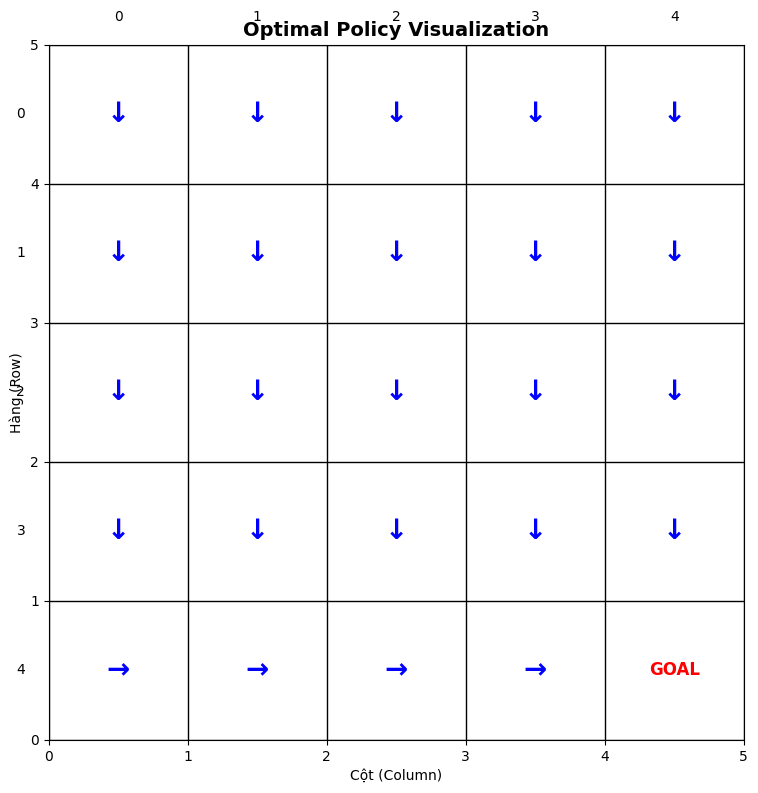

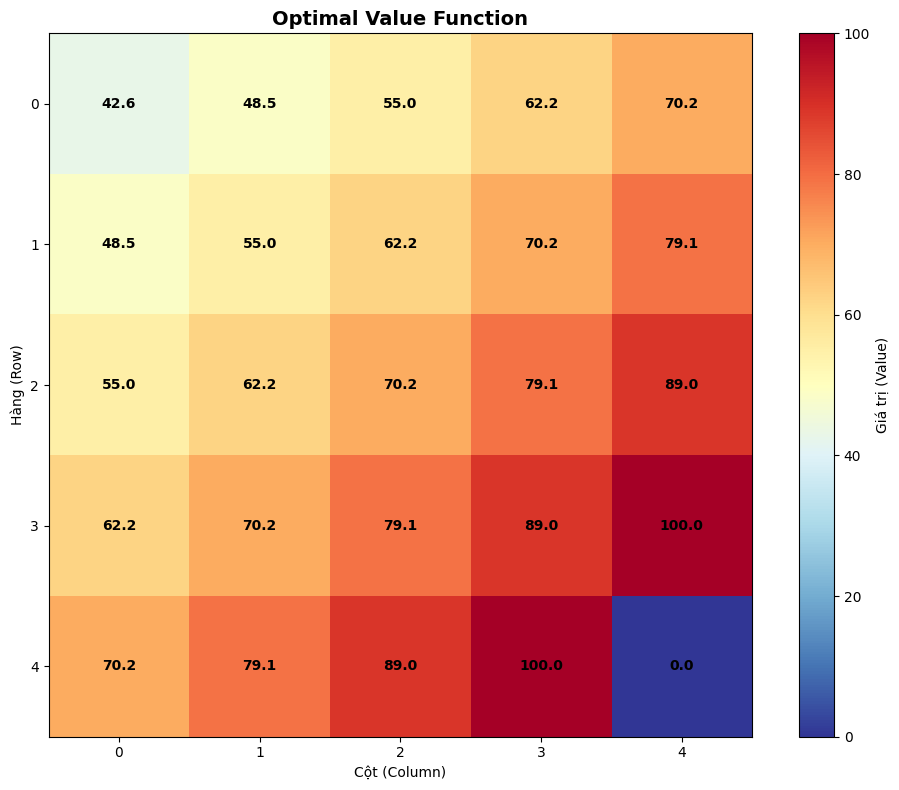

In [4]:
# Trực quan hóa chính sách tối ưu bằng mũi tên
import matplotlib.pyplot as plt

def visualize_policy(policy, title="Optimal Policy Visualization"):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Tạo lưới
    for i in range(grid_size + 1):
        ax.axhline(i, color='black', linewidth=1)
        ax.axvline(i, color='black', linewidth=1)
    
    # Định nghĩa hướng mũi tên
    directions = {
        0: (0, 0.3),    # up
        1: (0, -0.3),   # down  
        2: (-0.3, 0),   # left
        3: (0.3, 0)     # right
    }
    
    direction_names = {
        0: "↑", 1: "↓", 2: "←", 3: "→"
    }
    
    # Vẽ mũi tên cho mỗi ô
    for row in range(grid_size):
        for col in range(grid_size):
            if (row, col) == goal_state:
                ax.text(col + 0.5, grid_size - row - 0.5, "GOAL", 
                       ha='center', va='center', fontsize=12, fontweight='bold', color='red')
            else:
                action = int(policy[row, col])
                arrow = direction_names[action]
                ax.text(col + 0.5, grid_size - row - 0.5, arrow, 
                       ha='center', va='center', fontsize=20, fontweight='bold', color='blue')
    
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Cột (Column)')
    ax.set_ylabel('Hàng (Row)')
    
    # Thêm nhãn cho các ô
    for i in range(grid_size):
        ax.text(-0.2, grid_size - i - 0.5, str(i), ha='center', va='center')
        ax.text(i + 0.5, grid_size + 0.2, str(i), ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

# Trực quan hóa hàm giá trị
def visualize_value_function(V, title="Optimal Value Function"):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    im = ax.imshow(V, cmap='RdYlBu_r', interpolation='nearest')
    
    # Thêm giá trị vào mỗi ô
    for row in range(grid_size):
        for col in range(grid_size):
            text = ax.text(col, row, f'{V[row, col]:.1f}',
                         ha="center", va="center", color="black", fontweight='bold')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Cột (Column)')
    ax.set_ylabel('Hàng (Row)')
    
    # Thêm colorbar
    plt.colorbar(im, ax=ax, label='Giá trị (Value)')
    
    plt.tight_layout()
    plt.show()

print("=== TRỰC QUAN HÓA KẾT QUẢ ===")
visualize_policy(optimal_policy)
visualize_value_function(optimal_value_function)

## Phân tích chi tiết:

### 1. Tại sao chính sách tối ưu như vậy?
- **Hàng 1-4**: Tất cả các ô đều chọn hành động "đi xuống" (↓) vì đây là cách nhanh nhất để tiến đến hàng cuối cùng
- **Hàng 5**: Các ô từ trái sang phải chọn "đi phải" (→) để tiến đến ô mục tiêu (4,4)

### 2. Hàm giá trị cho thấy gì?
- **Gradient giá trị**: Giá trị tăng dần từ góc trái trên (42.61) đến ô mục tiêu (100)
- **Ô mục tiêu**: Có giá trị 0 vì đây là trạng thái kết thúc, không có hành động nào tiếp theo
- **Quy luật**: Mỗi bước di chuyển tốn -1 điểm, nhưng đạt mục tiêu được +100 điểm

### 3. Tại sao thuật toán hội tụ sau 9 vòng lặp?
- Ban đầu chính sách ngẫu nhiên không hiệu quả
- Qua mỗi vòng lặp, thuật toán học được cách tốt hơn để đến mục tiêu
- Sau 9 vòng, không còn cải thiện nào khác → chính sách đã tối ưu

### 4. Đường đi tối ưu:
Từ bất kỳ vị trí nào, agent sẽ:
1. Đi xuống cho đến khi đến hàng cuối (hàng 4)
2. Đi phải cho đến khi đến ô mục tiêu (4,4)

In [5]:
# filepath: /mnt/d/Ky 4/RL/1.ipynb
# Tạo lại môi trường với chướng ngại vật và bonus
import numpy as np

# Reset parameters
grid_size = 5
gamma = 0.9
goal_state = (4, 4)

# Danh sách ô chướng ngại vật và bonus
obstacles = [(1, 1), (2, 3), (4, 3)]
bonuses = [(2, 1), (3, 2), (3, 4)]

# Reset value function and policy
V = np.zeros((grid_size, grid_size))
policy = np.random.choice(a=[0, 1, 2, 3], size=(grid_size, grid_size))

print("=== MÔI TRƯỜNG MỚI VỚI CHƯỚNG NGẠI VẬT VÀ BONUS ===")
print(f"Chướng ngại vật (phạt -20): {obstacles}")
print(f"Ô bonus (thưởng +20): {bonuses}")
print(f"Mục tiêu (thưởng +100): {goal_state}")

def take_action(state, action):
    row, col = state
    
    # If already at goal state, stay there (terminal state)
    if state == goal_state:
        return state, 0
    
    if action == 0:  # up
        row = max(row - 1, 0)
    elif action == 1:  # down
        row = min(row + 1, grid_size - 1)
    elif action == 2:  # left
        col = max(col - 1, 0)
    elif action == 3:  # right
        col = min(col + 1, grid_size - 1)

    new_state = (row, col)
    
    # Nhận phần thưởng dựa trên loại ô
    if new_state == goal_state:
        reward = 100
    elif new_state in bonuses:
        reward = 20
    elif new_state in obstacles:
        reward = -20
    else:
        reward = -1 
    return new_state, reward

# xay dung ham danh gia chinh sach
def policy_evaluation(policy, V, theta=1e-6):
    iteration = 0
    while True:
        V_new = np.copy(V)
        delta = 0
        for row in range(grid_size):
            for col in range(grid_size):
                state = (row, col)
                action = int(policy[row, col])  # Ensure action is integer
                new_state, reward = take_action(state, action)
                v_old = V_new[row, col]
                V_new[row, col] = reward + gamma * V[new_state]
                delta = max(delta, abs(v_old - V_new[row, col]))
        
        V[:] = V_new
        iteration += 1
        if delta < theta or iteration > 1000:  # Add max iteration limit
            break

    return V

def policy_improvement(policy, V):
    policy_stable = True
    for row in range(grid_size):
        for col in range(grid_size):
            state = (row, col)
            old_action = int(policy[row, col])
            actions = [0, 1, 2, 3]
            action_values = []
            for action in actions:  # 4 possible actions
                new_state, reward = take_action(state, action)
                action_value = reward + gamma * V[new_state]
                action_values.append(action_value)
            best_action = np.argmax(action_values)
            policy[row, col] = best_action
            if old_action != best_action:
                policy_stable = False
    return policy, policy_stable

def policy_iteration(policy, V):
    iteration = 0
    while True:
        print(f"Policy Iteration: {iteration + 1}")
        V = policy_evaluation(policy, V)
        policy, policy_stable = policy_improvement(policy, V)
        iteration += 1
        if policy_stable or iteration > 100:  # Add max iteration limit
            break
    return policy, V

optimal_policy_new, optimal_value_function_new = policy_iteration(policy, V)
print("\n=== KẾT QUẢ VỚI MÔI TRƯỜNG MỚI ===")
print("Optimal Policy:")
print(optimal_policy_new)
print("Optimal Value Function:")
print(np.round(optimal_value_function_new, 2))

def find_optimal_path(start, goal, policy):
    path = []
    current_state = start
    visited = set()  # Tránh vòng lặp vô hạn
    
    while current_state != goal and current_state not in visited:
        path.append(current_state)
        visited.add(current_state)
        action = int(policy[current_state])
        next_state, reward = take_action(current_state, action)
        current_state = next_state
        
        # Tránh vòng lặp vô hạn
        if len(path) > grid_size * grid_size:
            break
    
    if current_state == goal:
        path.append(goal)
    
    return path

# Tìm đường đi tối ưu
start = (0, 0)
optimal_path = find_optimal_path(start, goal_state, optimal_policy_new)
print(f"\nCon đường tối ưu từ {start} đến {goal_state}:")
for i, state in enumerate(optimal_path):
    if i < len(optimal_path) - 1:
        print(f"{state} -> ", end="")
    else:
        print(f"{state}")

# Tính tổng reward của đường đi
total_reward = 0
for i in range(len(optimal_path) - 1):
    current = optimal_path[i]
    next_state = optimal_path[i + 1]
    # Tìm action để đi từ current đến next_state
    action = int(optimal_policy_new[current])
    _, reward = take_action(current, action)
    total_reward += reward
    print(f"Từ {current} đến {next_state}: reward = {reward}")

print(f"\nTổng reward của đường đi: {total_reward}")

=== MÔI TRƯỜNG MỚI VỚI CHƯỚNG NGẠI VẬT VÀ BONUS ===
Chướng ngại vật (phạt -20): [(1, 1), (2, 3), (4, 3)]
Ô bonus (thưởng +20): [(2, 1), (3, 2), (3, 4)]
Mục tiêu (thưởng +100): (4, 4)
Policy Iteration: 1
Policy Iteration: 2
Policy Iteration: 3
Policy Iteration: 4
Policy Iteration: 5
Policy Iteration: 6

=== KẾT QUẢ VỚI MÔI TRƯỜNG MỚI ===
Optimal Policy:
[[1 3 1 1 1]
 [1 1 1 3 1]
 [3 1 1 1 1]
 [3 3 3 3 3]
 [0 0 0 0 0]]
Optimal Value Function:
[[132.39 129.31 144.79 143.09 160.1 ]
 [148.21 165.79 161.99 160.1  179.  ]
 [165.79 161.99 181.1  179.   200.  ]
 [161.99 181.1  179.   200.   200.  ]
 [144.79 161.99 181.1  179.     0.  ]]

Con đường tối ưu từ (0, 0) đến (4, 4):
(0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (3, 1) -> (3, 2) -> (3, 3) -> (3, 4)
Từ (0, 0) đến (1, 0): reward = -1
Từ (1, 0) đến (2, 0): reward = -1
Từ (2, 0) đến (2, 1): reward = 20
Từ (2, 1) đến (3, 1): reward = -1
Từ (3, 1) đến (3, 2): reward = 20
Từ (3, 2) đến (3, 3): reward = -1
Từ (3, 3) đến (3, 4): reward = 20

Tổng rew

=== TRỰC QUAN HÓA MÔI TRƯỜNG MỚI ===


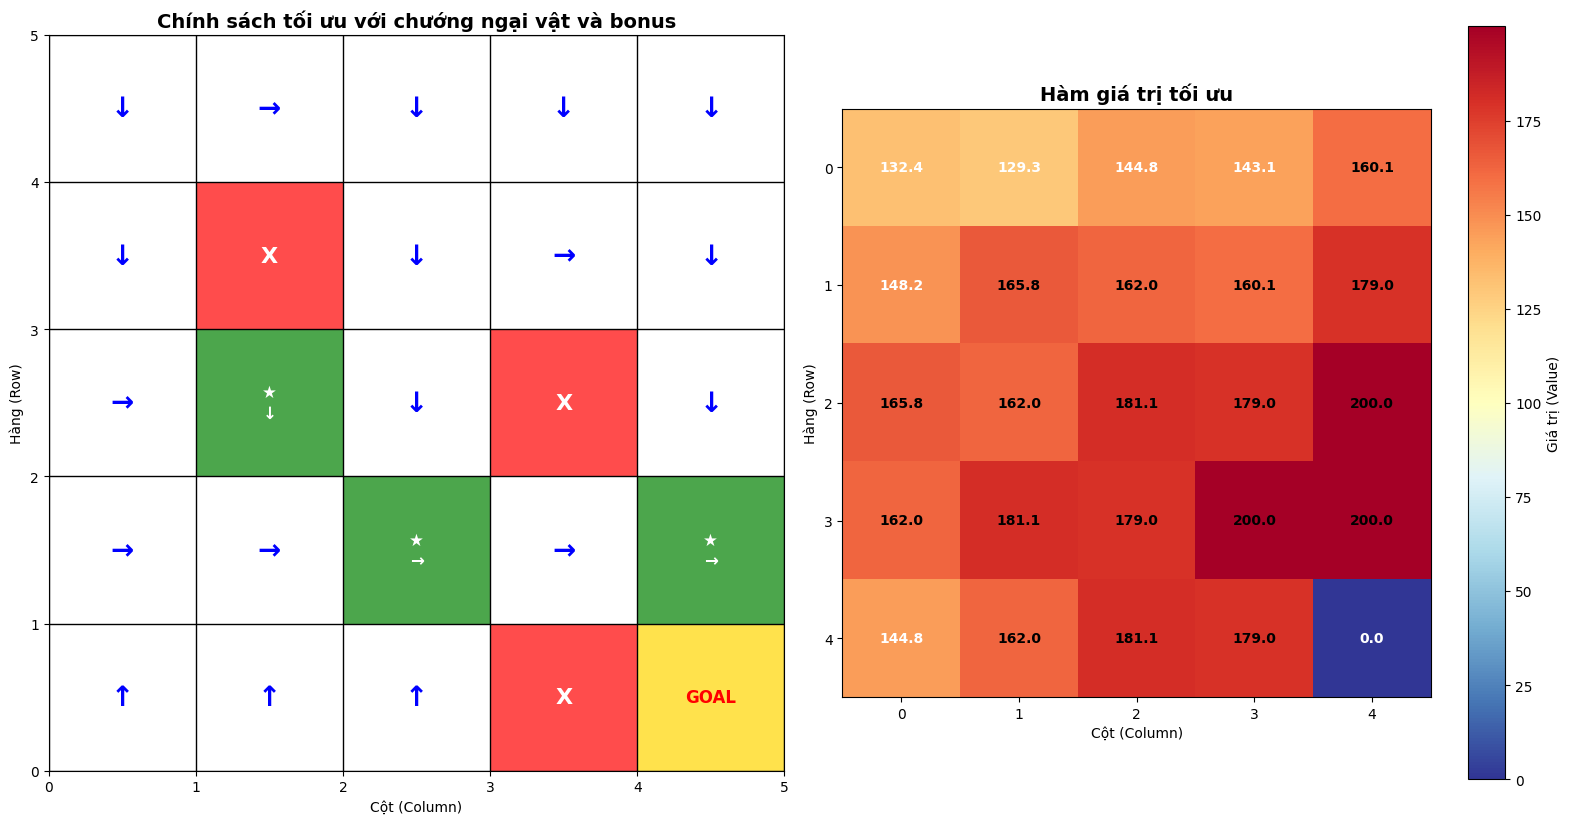


=== SO SÁNH KẾT QUẢ ===
Môi trường cũ (không có chướng ngại vật):
- Tất cả ô đều đi xuống rồi đi phải
- Đường đi đơn giản nhất

Môi trường mới (có chướng ngại vật và bonus):
- Agent tránh chướng ngại vật
- Agent có thể đi qua ô bonus để nhận thêm điểm
- Chính sách phức tạp hơn và thông minh hơn


In [6]:
# Trực quan hóa môi trường mới với chướng ngại vật và bonus
import matplotlib.pyplot as plt

def visualize_environment_with_policy(policy, V, obstacles, bonuses, goal_state):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Vẽ chính sách với môi trường
    for i in range(grid_size + 1):
        ax1.axhline(i, color='black', linewidth=1)
        ax1.axvline(i, color='black', linewidth=1)
    
    direction_names = {0: "↑", 1: "↓", 2: "←", 3: "→"}
    
    # Vẽ các ô và hành động
    for row in range(grid_size):
        for col in range(grid_size):
            state = (row, col)
            
            # Màu nền cho các loại ô khác nhau
            if state == goal_state:
                ax1.add_patch(plt.Rectangle((col, grid_size-row-1), 1, 1, 
                                          facecolor='gold', alpha=0.7))
                ax1.text(col + 0.5, grid_size - row - 0.5, "GOAL", 
                        ha='center', va='center', fontsize=12, fontweight='bold', color='red')
            elif state in obstacles:
                ax1.add_patch(plt.Rectangle((col, grid_size-row-1), 1, 1, 
                                          facecolor='red', alpha=0.7))
                ax1.text(col + 0.5, grid_size - row - 0.5, "X", 
                        ha='center', va='center', fontsize=16, fontweight='bold', color='white')
            elif state in bonuses:
                ax1.add_patch(plt.Rectangle((col, grid_size-row-1), 1, 1, 
                                          facecolor='green', alpha=0.7))
                action = int(policy[row, col])
                arrow = direction_names[action]
                ax1.text(col + 0.5, grid_size - row - 0.5, f"★\n{arrow}", 
                        ha='center', va='center', fontsize=12, fontweight='bold', color='white')
            else:
                action = int(policy[row, col])
                arrow = direction_names[action]
                ax1.text(col + 0.5, grid_size - row - 0.5, arrow, 
                        ha='center', va='center', fontsize=20, fontweight='bold', color='blue')
    
    ax1.set_xlim(0, grid_size)
    ax1.set_ylim(0, grid_size)
    ax1.set_aspect('equal')
    ax1.set_title('Chính sách tối ưu với chướng ngại vật và bonus', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Cột (Column)')
    ax1.set_ylabel('Hàng (Row)')
    
    # Vẽ hàm giá trị
    im = ax2.imshow(V, cmap='RdYlBu_r', interpolation='nearest')
    
    # Thêm giá trị vào mỗi ô
    for row in range(grid_size):
        for col in range(grid_size):
            color = 'white' if V[row, col] < np.mean(V) else 'black'
            ax2.text(col, row, f'{V[row, col]:.1f}',
                    ha="center", va="center", color=color, fontweight='bold')
    
    ax2.set_title('Hàm giá trị tối ưu', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Cột (Column)')
    ax2.set_ylabel('Hàng (Row)')
    
    # Thêm colorbar
    plt.colorbar(im, ax=ax2, label='Giá trị (Value)')
    
    plt.tight_layout()
    plt.show()

print("=== TRỰC QUAN HÓA MÔI TRƯỜNG MỚI ===")
visualize_environment_with_policy(optimal_policy_new, optimal_value_function_new, 
                                 obstacles, bonuses, goal_state)

# So sánh với môi trường cũ
print("\n=== SO SÁNH KẾT QUẢ ===")
print("Môi trường cũ (không có chướng ngại vật):")
print("- Tất cả ô đều đi xuống rồi đi phải")
print("- Đường đi đơn giản nhất")

print("\nMôi trường mới (có chướng ngại vật và bonus):")
print("- Agent tránh chướng ngại vật")
print("- Agent có thể đi qua ô bonus để nhận thêm điểm")
print("- Chính sách phức tạp hơn và thông minh hơn")

## Giải thích kết quả với chướng ngại vật và bonus:

### 1. Thay đổi trong môi trường:
- **Chướng ngại vật** tại (1,1), (2,3), (4,3): Phạt -20 điểm
- **Ô bonus** tại (2,1), (3,2), (3,4): Thưởng +20 điểm  
- **Ô thường**: Vẫn phạt -1 điểm mỗi bước
- **Mục tiêu** tại (4,4): Thưởng +100 điểm

### 2. Tác động đến chính sách:
- Agent học cách **tránh chướng ngại vật** để không bị phạt nặng
- Agent có thể **đi qua ô bonus** nếu lợi ích tổng thể cao hơn
- Chính sách không còn đơn giản "đi xuống rồi đi phải" nữa

### 3. Thay đổi trong hàm giá trị:
- Các ô gần chướng ngại vật có **giá trị thấp hơn**
- Các ô gần bonus có **giá trị cao hơn** 
- Gradient giá trị không còn đơn điệu như trước

### 4. Đường đi tối ưu:
- Agent sẽ chọn đường đi tránh chướng ngại vật
- Có thể đi vòng để lấy bonus nếu đáng giá
- Tổng reward có thể cao hơn hoặc thấp hơn tùy vào đường đi

### 5. Ý nghĩa thực tế:
- Mô phỏng môi trường thực tế với **rủi ro** (chướng ngại vật) và **cơ hội** (bonus)
- Agent học cách **cân bằng rủi ro-lợi ích**
- Chính sách trở nên **linh hoạt và thông minh** hơn

# Bài Tập Thực Hành Policy Iteration

## Bài tập 1: Gridworld với gió hoặc lực cản
**Mô tả:**
• Mỗi ô trong grid có thêm yếu tố gió/lực cản ngẫu nhiên, có thể đẩy tác tử về hướng khác.
• Ví dụ: 30% thời gian, tác tử di chuyển theo ý muốn, nhưng 70% có thể bị đẩy sang trái/phải/lên/xuống tùy vào hướng gió.

## Bài tập 2: Gridworld nhiều mục tiêu với ưu tiên phần thưởng
**Mô tả:**
• Tạo một grid 5x5 với nhiều trạng thái có phần thưởng khác nhau, ví dụ: R1=+10, R2=+5, R3=-10, R4 = -2.
• Tác tử phải chọn mục tiêu ưu tiên (phần thưởng cao nhất) nhưng có thể phải vượt qua trạng thái có phần thưởng âm.

## Bài tập 3: Frozen Lake (Hồ băng đơn giản)
**Mô tả:**
• Biến bài toán thành một grid mô phỏng một cái hồ băng (frozen lake)
• Một số ô là "băng an toàn" (có thể đi qua).
• Một số ô là "băng trơn" (có xác suất ngã xuống và thất bại) và phải đi lại từ đầu với phần thưởng âm -100.
• Có 2 mục tiêu cuối cùng với phần thưởng cao.
• Tác tử phải tìm đường đi đến đích mà không bị ngã.

In [7]:
# Bài tập 1: Gridworld với gió/lực cản
import numpy as np
import matplotlib.pyplot as plt

class WindyGridworld:
    def __init__(self, grid_size=5, gamma=0.9, wind_prob=0.7):
        self.grid_size = grid_size
        self.gamma = gamma
        self.wind_prob = wind_prob  # Xác suất bị ảnh hưởng bởi gió
        self.goal_state = (4, 4)
        self.V = np.zeros((grid_size, grid_size))
        self.policy = np.random.choice(4, size=(grid_size, grid_size))
        
        # Định nghĩa hướng gió cho mỗi vùng
        self.wind_directions = {
            'north': [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],  # Gió thổi xuống
            'south': [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)],  # Gió thổi lên
            'west': [(1, 0), (2, 0), (3, 0)],                   # Gió thổi phải
            'east': [(1, 4), (2, 4), (3, 4)],                   # Gió thổi trái
        }
    
    def get_wind_effect(self, state):
        """Xác định hiệu ứng gió tại state"""
        for direction, positions in self.wind_directions.items():
            if state in positions:
                if direction == 'north':
                    return 1  # Bị đẩy xuống
                elif direction == 'south':
                    return 0  # Bị đẩy lên
                elif direction == 'west':
                    return 3  # Bị đẩy phải
                elif direction == 'east':
                    return 2  # Bị đẩy trái
        return None  # Không có gió
    
    def take_action_stochastic(self, state, action):
        """Thực hiện hành động với hiệu ứng gió ngẫu nhiên"""
        if state == self.goal_state:
            return state, 0
        
        # Xác định hành động thực tế
        wind_effect = self.get_wind_effect(state)
        if wind_effect is not None and np.random.random() < self.wind_prob:
            actual_action = wind_effect  # Bị gió ảnh hưởng
        else:
            actual_action = action  # Theo ý muốn
        
        row, col = state
        if actual_action == 0:  # up
            row = max(row - 1, 0)
        elif actual_action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif actual_action == 2:  # left
            col = max(col - 1, 0)
        elif actual_action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        reward = 100 if new_state == self.goal_state else -1
        return new_state, reward
    
    def expected_value_calculation(self, state, action):
        """Tính expected value cho stochastic environment"""
        if state == self.goal_state:
            return 0
        
        wind_effect = self.get_wind_effect(state)
        expected_value = 0
        
        if wind_effect is not None:
            # 30% theo ý muốn, 70% bị gió ảnh hưởng
            prob_intended = 1 - self.wind_prob
            prob_wind = self.wind_prob
            
            # Tính cho hành động theo ý muốn
            new_state_intended, reward_intended = self._move(state, action)
            expected_value += prob_intended * (reward_intended + self.gamma * self.V[new_state_intended])
            
            # Tính cho hành động bị gió ảnh hưởng
            new_state_wind, reward_wind = self._move(state, wind_effect)
            expected_value += prob_wind * (reward_wind + self.gamma * self.V[new_state_wind])
        else:
            # Không có gió, chỉ có 1 khả năng
            new_state, reward = self._move(state, action)
            expected_value = reward + self.gamma * self.V[new_state]
        
        return expected_value
    
    def _move(self, state, action):
        """Helper function để di chuyển deterministic"""
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        reward = 100 if new_state == self.goal_state else -1
        return new_state, reward
    
    def policy_evaluation_stochastic(self, theta=1e-6):
        while True:
            V_new = np.copy(self.V)
            delta = 0
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    action = int(self.policy[row, col])
                    v_old = V_new[row, col]
                    V_new[row, col] = self.expected_value_calculation(state, action)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            if delta < theta:
                break
    
    def policy_improvement_stochastic(self):
        policy_stable = True
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                old_action = int(self.policy[row, col])
                
                action_values = []
                for action in range(4):
                    action_values.append(self.expected_value_calculation(state, action))
                
                best_action = np.argmax(action_values)
                self.policy[row, col] = best_action
                if old_action != best_action:
                    policy_stable = False
        return policy_stable
    
    def solve(self):
        iteration = 0
        while True:
            print(f"Windy Policy Iteration: {iteration + 1}")
            self.policy_evaluation_stochastic()
            policy_stable = self.policy_improvement_stochastic()
            iteration += 1
            if policy_stable or iteration > 50:
                break
        return self.policy, self.V

# Chạy bài tập 1
print("=== BÀI TẬP 1: GRIDWORLD VỚI GIÓ ===")
windy_env = WindyGridworld()
windy_policy, windy_values = windy_env.solve()

print("Optimal Policy (Windy):")
print(windy_policy)
print("Value Function (Windy):")
print(np.round(windy_values, 2))

=== BÀI TẬP 1: GRIDWORLD VỚI GIÓ ===
Windy Policy Iteration: 1
Windy Policy Iteration: 2
Windy Policy Iteration: 3
Windy Policy Iteration: 4
Windy Policy Iteration: 5
Optimal Policy (Windy):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [3 3 3 1 1]
 [3 3 3 3 0]]
Value Function (Windy):
[[26.45 30.5  35.   40.   35.95]
 [30.5  35.   40.   45.56 41.06]
 [35.   40.   45.56 51.73 49.47]
 [40.   45.56 51.73 58.59 66.21]
 [35.29 41.06 49.47 66.21  0.  ]]


In [8]:
# Bài tập 2: Gridworld nhiều mục tiêu với ưu tiên phần thưởng
class MultiGoalGridworld:
    def __init__(self, grid_size=5, gamma=0.9):
        self.grid_size = grid_size
        self.gamma = gamma
        self.V = np.zeros((grid_size, grid_size))
        self.policy = np.random.choice(4, size=(grid_size, grid_size))
        
        # Định nghĩa nhiều mục tiêu với phần thưởng khác nhau
        self.rewards = {
            (0, 4): 100,   # R1 = +100 (mục tiêu chính)
            (2, 2): 50,    # R2 = +50 (mục tiêu phụ)
            (4, 0): 30,    # R3 = +30 (mục tiêu phụ)
            (1, 1): -50,   # R4 = -50 (chướng ngại vật lớn)
            (3, 3): -20,   # R5 = -20 (chướng ngại vật nhỏ)
            (2, 4): -30,   # R6 = -30 (chướng ngại vật)
        }
        
        # Terminal states (kết thúc khi đạt mục tiêu tích cực)
        self.terminal_states = [(0, 4), (2, 2), (4, 0)]
    
    def take_action(self, state, action):
        if state in self.terminal_states:
            return state, 0
        
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        reward = self.rewards.get(new_state, -1)  # Default reward = -1
        return new_state, reward
    
    def policy_evaluation(self, theta=1e-6):
        while True:
            V_new = np.copy(self.V)
            delta = 0
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    action = int(self.policy[row, col])
                    new_state, reward = self.take_action(state, action)
                    v_old = V_new[row, col]
                    V_new[row, col] = reward + self.gamma * self.V[new_state]
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            if delta < theta:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                old_action = int(self.policy[row, col])
                
                action_values = []
                for action in range(4):
                    new_state, reward = self.take_action(state, action)
                    action_value = reward + self.gamma * self.V[new_state]
                    action_values.append(action_value)
                
                best_action = np.argmax(action_values)
                self.policy[row, col] = best_action
                if old_action != best_action:
                    policy_stable = False
        return policy_stable
    
    def solve(self):
        iteration = 0
        while True:
            print(f"Multi-Goal Policy Iteration: {iteration + 1}")
            self.policy_evaluation()
            policy_stable = self.policy_improvement()
            iteration += 1
            if policy_stable or iteration > 50:
                break
        return self.policy, self.V

# Chạy bài tập 2
print("\n=== BÀI TẬP 2: GRIDWORLD NHIỀU MỤC TIÊU ===")
multi_goal_env = MultiGoalGridworld()
print("Rewards mapping:")
for state, reward in multi_goal_env.rewards.items():
    print(f"  {state}: {reward}")
print("Terminal states:", multi_goal_env.terminal_states)

multi_policy, multi_values = multi_goal_env.solve()
print("Optimal Policy (Multi-Goal):")
print(multi_policy)
print("Value Function (Multi-Goal):")
print(np.round(multi_values, 2))


=== BÀI TẬP 2: GRIDWORLD NHIỀU MỤC TIÊU ===
Rewards mapping:
  (0, 4): 100
  (2, 2): 50
  (4, 0): 30
  (1, 1): -50
  (3, 3): -20
  (2, 4): -30
Terminal states: [(0, 4), (2, 2), (4, 0)]
Multi-Goal Policy Iteration: 1
Multi-Goal Policy Iteration: 2
Multi-Goal Policy Iteration: 3
Multi-Goal Policy Iteration: 4
Multi-Goal Policy Iteration: 5
Multi-Goal Policy Iteration: 6
Multi-Goal Policy Iteration: 7
Optimal Policy (Multi-Goal):
[[3 3 3 3 0]
 [0 0 0 0 0]
 [0 3 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Value Function (Multi-Goal):
[[ 70.19  79.1   89.   100.     0.  ]
 [ 62.17  70.19  79.1   89.   100.  ]
 [ 54.95  50.     0.    79.1   89.  ]
 [ 48.46  44.    50.    70.19  50.1 ]
 [  0.    38.6   44.    43.17  44.09]]


In [9]:
# Bài tập 3: Frozen Lake
class FrozenLake:
    def __init__(self, grid_size=5, gamma=0.9, slip_prob=0.3):
        self.grid_size = grid_size
        self.gamma = gamma
        self.slip_prob = slip_prob  # Xác suất trượt trên băng
        self.V = np.zeros((grid_size, grid_size))
        self.policy = np.random.choice(4, size=(grid_size, grid_size))
        
        # Định nghĩa các loại ô
        self.safe_ice = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), 
                        (2, 1), (3, 0), (3, 2), (3, 3), (4, 1), (4, 2)]  # Băng an toàn
        self.slippery_ice = [(0, 3), (1, 1), (1, 3), (2, 2), (2, 3), 
                            (3, 1), (4, 0)]  # Băng trơn (có thể trượt)
        self.holes = [(1, 4), (2, 4)]  # Lỗ băng (thất bại)
        self.goals = [(0, 4), (4, 3)]  # 2 mục tiêu
        self.start = (4, 4)  # Điểm bắt đầu
        
        # Rewards
        self.goal_reward = 100
        self.hole_penalty = -100
        self.step_penalty = -1
    
    def is_valid_state(self, state):
        row, col = state
        return 0 <= row < self.grid_size and 0 <= col < self.grid_size
    
    def take_action_deterministic(self, state, action):
        """Phiên bản deterministic cho tính toán expected value"""
        if state in self.goals:
            return state, 0
        
        row, col = state
        if action == 0:  # up
            row = max(row - 1, 0)
        elif action == 1:  # down
            row = min(row + 1, self.grid_size - 1)
        elif action == 2:  # left
            col = max(col - 1, 0)
        elif action == 3:  # right
            col = min(col + 1, self.grid_size - 1)
        
        new_state = (row, col)
        
        if new_state in self.goals:
            reward = self.goal_reward
        elif new_state in self.holes:
            reward = self.hole_penalty
            new_state = self.start  # Reset về start
        else:
            reward = self.step_penalty
        
        return new_state, reward
    
    def get_slip_outcomes(self, state, action):
        """Tính toán các kết quả có thể xảy ra khi trượt"""
        outcomes = []
        
        if state in self.slippery_ice:
            # Trên băng trơn: có thể trượt sang 4 hướng
            for slip_action in range(4):
                new_state, reward = self.take_action_deterministic(state, slip_action)
                prob = self.slip_prob / 4 if slip_action != action else (1 - self.slip_prob + self.slip_prob / 4)
                outcomes.append((new_state, reward, prob))
        else:
            # Trên băng an toàn: chỉ có 1 kết quả
            new_state, reward = self.take_action_deterministic(state, action)
            outcomes.append((new_state, reward, 1.0))
        
        return outcomes
    
    def expected_value_calculation(self, state, action):
        if state in self.goals:
            return 0
        
        outcomes = self.get_slip_outcomes(state, action)
        expected_value = 0
        
        for new_state, reward, prob in outcomes:
            expected_value += prob * (reward + self.gamma * self.V[new_state])
        
        return expected_value
    
    def policy_evaluation(self, theta=1e-6):
        iteration = 0
        while True:
            V_new = np.copy(self.V)
            delta = 0
            for row in range(self.grid_size):
                for col in range(self.grid_size):
                    state = (row, col)
                    action = int(self.policy[row, col])
                    v_old = V_new[row, col]
                    V_new[row, col] = self.expected_value_calculation(state, action)
                    delta = max(delta, abs(v_old - V_new[row, col]))
            
            self.V[:] = V_new
            iteration += 1
            if delta < theta or iteration > 1000:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                old_action = int(self.policy[row, col])
                
                action_values = []
                for action in range(4):
                    action_values.append(self.expected_value_calculation(state, action))
                
                best_action = np.argmax(action_values)
                self.policy[row, col] = best_action
                if old_action != best_action:
                    policy_stable = False
        return policy_stable
    
    def solve(self):
        iteration = 0
        while True:
            print(f"Frozen Lake Policy Iteration: {iteration + 1}")
            self.policy_evaluation()
            policy_stable = self.policy_improvement()
            iteration += 1
            if policy_stable or iteration > 50:
                break
        return self.policy, self.V

# Chạy bài tập 3
print("\n=== BÀI TẬP 3: FROZEN LAKE ===")
frozen_lake = FrozenLake()
print("Environment setup:")
print(f"Safe ice: {frozen_lake.safe_ice}")
print(f"Slippery ice: {frozen_lake.slippery_ice}")
print(f"Holes: {frozen_lake.holes}")
print(f"Goals: {frozen_lake.goals}")
print(f"Start: {frozen_lake.start}")
print(f"Slip probability: {frozen_lake.slip_prob}")

frozen_policy, frozen_values = frozen_lake.solve()
print("Optimal Policy (Frozen Lake):")
print(frozen_policy)
print("Value Function (Frozen Lake):")
print(np.round(frozen_values, 2))


=== BÀI TẬP 3: FROZEN LAKE ===
Environment setup:
Safe ice: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 0), (3, 2), (3, 3), (4, 1), (4, 2)]
Slippery ice: [(0, 3), (1, 1), (1, 3), (2, 2), (2, 3), (3, 1), (4, 0)]
Holes: [(1, 4), (2, 4)]
Goals: [(0, 4), (4, 3)]
Start: (4, 4)
Slip probability: 0.3
Frozen Lake Policy Iteration: 1
Frozen Lake Policy Iteration: 2
Frozen Lake Policy Iteration: 3
Frozen Lake Policy Iteration: 4
Frozen Lake Policy Iteration: 5
Optimal Policy (Frozen Lake):
[[3 3 3 3 0]
 [0 3 0 0 0]
 [1 1 1 1 1]
 [3 1 1 1 1]
 [3 3 3 0 2]]
Value Function (Frozen Lake):
[[ 66.06  74.51  83.9   94.33   0.  ]
 [ 58.45  64.51  74.51  74.43 100.  ]
 [ 59.83  67.59  75.95  78.23  79.1 ]
 [ 67.59  76.21  89.   100.    89.  ]
 [ 75.88  89.   100.     0.   100.  ]]



=== TRỰC QUAN HÓA TẤT CẢ CÁC BÀI TẬP ===


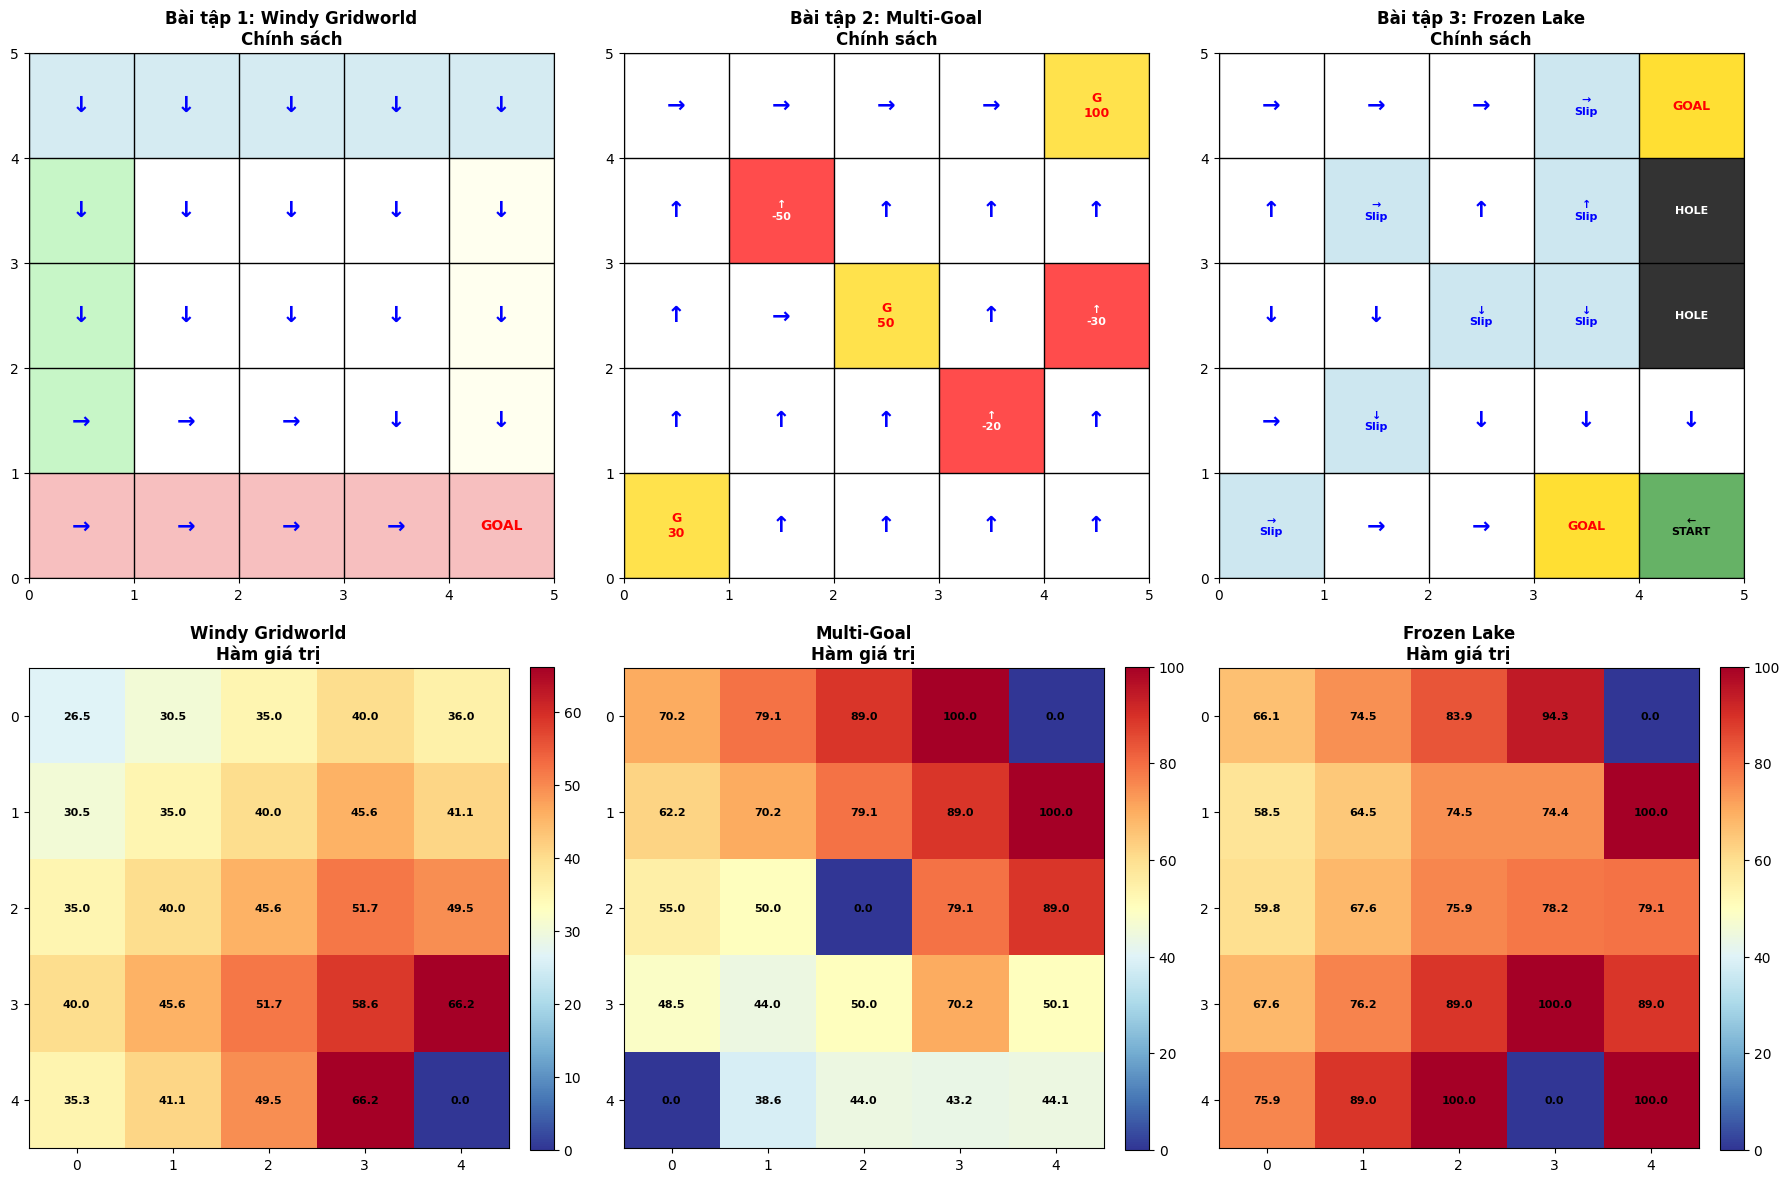


=== TÓM TẮT KẾT QUẢ ===
1. Windy Gridworld:
   - Có 8 ô không đi xuống do ảnh hưởng gió
   - Giá trị trung bình: 41.44
2. Multi-Goal Gridworld:
   - Giá trị cao nhất: 100.00
   - Agent ưu tiên mục tiêu có reward cao nhất
3. Frozen Lake:
   - Giá trị trung bình: 73.52
   - Chính sách cẩn thận tránh holes và băng trơn


In [10]:
# Trực quan hóa kết quả của cả 3 bài tập
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_environments():
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    direction_names = {0: "↑", 1: "↓", 2: "←", 3: "→"}
    
    # Bài tập 1: Windy Gridworld
    ax1 = axes[0, 0]
    ax1.set_title('Bài tập 1: Windy Gridworld\nChính sách', fontsize=12, fontweight='bold')
    
    # Vẽ grid
    for i in range(6):
        ax1.axhline(i, color='black', linewidth=1)
        ax1.axvline(i, color='black', linewidth=1)
    
    # Vẽ vùng gió
    wind_colors = {'north': 'lightblue', 'south': 'lightcoral', 
                  'west': 'lightgreen', 'east': 'lightyellow'}
    
    for direction, positions in windy_env.wind_directions.items():
        for pos in positions:
            row, col = pos
            ax1.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                      facecolor=wind_colors[direction], alpha=0.5))
    
    # Vẽ policy và goal
    for row in range(5):
        for col in range(5):
            if (row, col) == windy_env.goal_state:
                ax1.text(col + 0.5, 5 - row - 0.5, "GOAL", 
                        ha='center', va='center', fontsize=10, fontweight='bold', color='red')
            else:
                action = int(windy_policy[row, col])
                arrow = direction_names[action]
                ax1.text(col + 0.5, 5 - row - 0.5, arrow, 
                        ha='center', va='center', fontsize=16, fontweight='bold', color='blue')
    
    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 5)
    ax1.set_aspect('equal')
    
    # Value function cho windy
    ax2 = axes[1, 0]
    im1 = ax2.imshow(windy_values, cmap='RdYlBu_r')
    ax2.set_title('Windy Gridworld\nHàm giá trị', fontsize=12, fontweight='bold')
    for row in range(5):
        for col in range(5):
            ax2.text(col, row, f'{windy_values[row, col]:.1f}',
                    ha="center", va="center", color="black", fontweight='bold', fontsize=8)
    plt.colorbar(im1, ax=ax2, fraction=0.046, pad=0.04)
    
    # Bài tập 2: Multi-Goal
    ax3 = axes[0, 1]
    ax3.set_title('Bài tập 2: Multi-Goal\nChính sách', fontsize=12, fontweight='bold')
    
    for i in range(6):
        ax3.axhline(i, color='black', linewidth=1)
        ax3.axvline(i, color='black', linewidth=1)
    
    # Vẽ rewards và policy
    for row in range(5):
        for col in range(5):
            state = (row, col)
            if state in multi_goal_env.terminal_states:
                reward = multi_goal_env.rewards[state]
                ax3.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='gold', alpha=0.7))
                ax3.text(col + 0.5, 5 - row - 0.5, f"G\n{reward}", 
                        ha='center', va='center', fontsize=9, fontweight='bold', color='red')
            elif state in multi_goal_env.rewards and multi_goal_env.rewards[state] < 0:
                ax3.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='red', alpha=0.7))
                action = int(multi_policy[row, col])
                arrow = direction_names[action]
                ax3.text(col + 0.5, 5 - row - 0.5, f"{arrow}\n{multi_goal_env.rewards[state]}", 
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')
            else:
                action = int(multi_policy[row, col])
                arrow = direction_names[action]
                ax3.text(col + 0.5, 5 - row - 0.5, arrow, 
                        ha='center', va='center', fontsize=16, fontweight='bold', color='blue')
    
    ax3.set_xlim(0, 5)
    ax3.set_ylim(0, 5)
    ax3.set_aspect('equal')
    
    # Value function cho multi-goal
    ax4 = axes[1, 1]
    im2 = ax4.imshow(multi_values, cmap='RdYlBu_r')
    ax4.set_title('Multi-Goal\nHàm giá trị', fontsize=12, fontweight='bold')
    for row in range(5):
        for col in range(5):
            ax4.text(col, row, f'{multi_values[row, col]:.1f}',
                    ha="center", va="center", color="black", fontweight='bold', fontsize=8)
    plt.colorbar(im2, ax=ax4, fraction=0.046, pad=0.04)
    
    # Bài tập 3: Frozen Lake
    ax5 = axes[0, 2]
    ax5.set_title('Bài tập 3: Frozen Lake\nChính sách', fontsize=12, fontweight='bold')
    
    for i in range(6):
        ax5.axhline(i, color='black', linewidth=1)
        ax5.axvline(i, color='black', linewidth=1)
    
    # Vẽ environment và policy
    for row in range(5):
        for col in range(5):
            state = (row, col)
            if state in frozen_lake.goals:
                ax5.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='gold', alpha=0.8))
                ax5.text(col + 0.5, 5 - row - 0.5, "GOAL", 
                        ha='center', va='center', fontsize=9, fontweight='bold', color='red')
            elif state in frozen_lake.holes:
                ax5.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='black', alpha=0.8))
                ax5.text(col + 0.5, 5 - row - 0.5, "HOLE", 
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')
            elif state in frozen_lake.slippery_ice:
                ax5.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='lightblue', alpha=0.6))
                action = int(frozen_policy[row, col])
                arrow = direction_names[action]
                ax5.text(col + 0.5, 5 - row - 0.5, f"{arrow}\nSlip", 
                        ha='center', va='center', fontsize=8, fontweight='bold', color='blue')
            elif state == frozen_lake.start:
                ax5.add_patch(plt.Rectangle((col, 5-row-1), 1, 1, 
                                          facecolor='green', alpha=0.6))
                action = int(frozen_policy[row, col])
                arrow = direction_names[action]
                ax5.text(col + 0.5, 5 - row - 0.5, f"{arrow}\nSTART", 
                        ha='center', va='center', fontsize=8, fontweight='bold', color='black')
            else:
                action = int(frozen_policy[row, col])
                arrow = direction_names[action]
                ax5.text(col + 0.5, 5 - row - 0.5, arrow, 
                        ha='center', va='center', fontsize=16, fontweight='bold', color='blue')
    
    ax5.set_xlim(0, 5)
    ax5.set_ylim(0, 5)
    ax5.set_aspect('equal')
    
    # Value function cho frozen lake
    ax6 = axes[1, 2]
    im3 = ax6.imshow(frozen_values, cmap='RdYlBu_r')
    ax6.set_title('Frozen Lake\nHàm giá trị', fontsize=12, fontweight='bold')
    for row in range(5):
        for col in range(5):
            ax6.text(col, row, f'{frozen_values[row, col]:.1f}',
                    ha="center", va="center", color="black", fontweight='bold', fontsize=8)
    plt.colorbar(im3, ax=ax6, fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

print("\n=== TRỰC QUAN HÓA TẤT CẢ CÁC BÀI TẬP ===")
visualize_all_environments()

# Tóm tắt kết quả
print("\n=== TÓM TẮT KẾT QUẢ ===")
print("1. Windy Gridworld:")
print(f"   - Có {len([p for row in windy_policy for p in row if p != 1])} ô không đi xuống do ảnh hưởng gió")
print(f"   - Giá trị trung bình: {np.mean(windy_values):.2f}")

print("2. Multi-Goal Gridworld:")
print(f"   - Giá trị cao nhất: {np.max(multi_values):.2f}")
print(f"   - Agent ưu tiên mục tiêu có reward cao nhất")

print("3. Frozen Lake:")
print(f"   - Giá trị trung bình: {np.mean(frozen_values):.2f}")
print(f"   - Chính sách cẩn thận tránh holes và băng trơn")